In [1]:
import os
os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
root = "./analysis_out/"
paths = [os.path.join(root, f) for f in os.listdir(root)]

In [5]:
def rank_each(elements):
    elements = np.array(elements)
    return (elements > elements[:,None]).sum(0) / elements.shape[0]

In [6]:
datas = []
for path in paths:
    with open(path) as f:
        data = json.load(f)
    data = pd.DataFrame(data, columns=["Partial", "upper_bound", "real", "lower_bound"])
    datas.append((path, data))

In [7]:
def plot(ax, fx, fy, bound_title):
    for path, data in datas:
        name = os.path.basename(path).split(".")[0]
        x, y = fx(data), fy(data)
        rx, ry = rank_each(x), rank_each(y)
        ax.scatter(rx, ry, alpha=0.2, label=f"{name}: rank_r={np.corrcoef(rx, ry)[0,1]:+.2%}")
    ax.set_title(f"{bound_title}")
    ax.set_xlabel("Actual Best")
    ax.set_ylabel(bound_title)
    ax.legend()

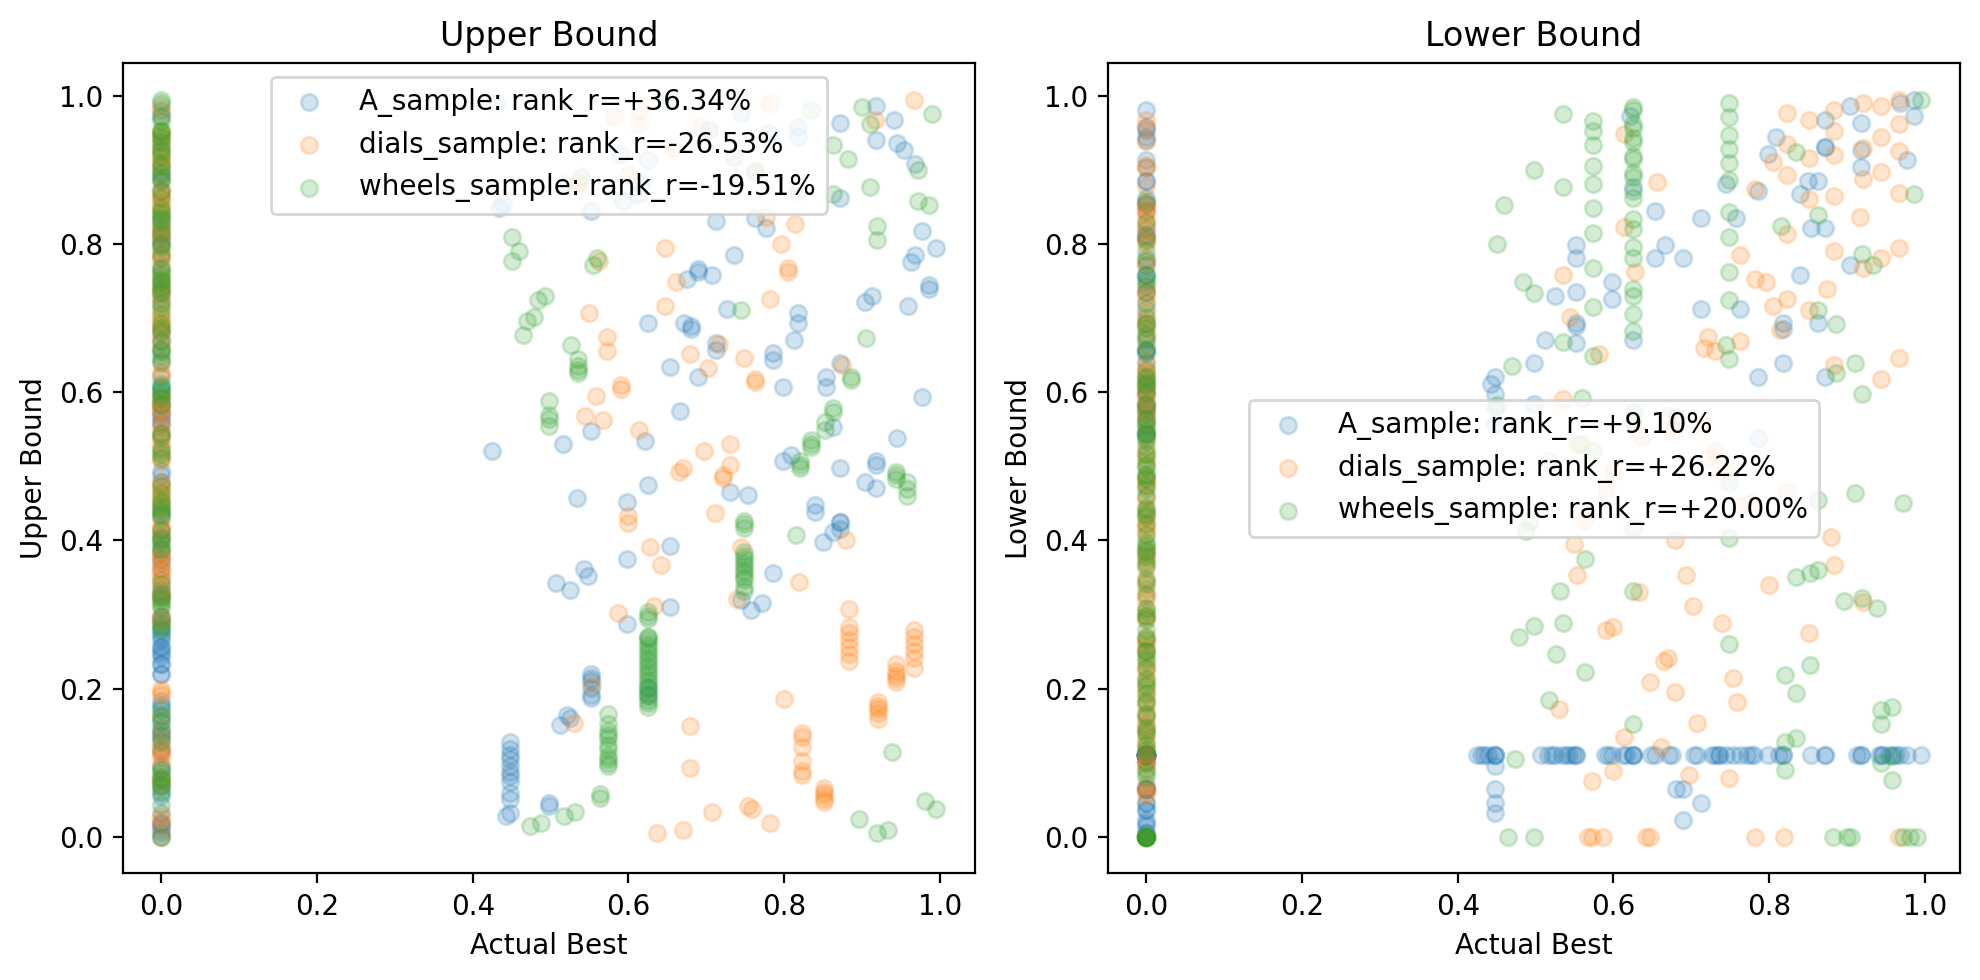

In [8]:
_, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=200, tight_layout=True)
plot(axs[0], lambda d: d.real, lambda d: d.upper_bound, "Upper Bound")
plot(axs[1], lambda d: d.real, lambda d: d.lower_bound, "Lower Bound")